In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import particle
reload(particle)

<module 'particle' from 'particle.pyc'>

In [2]:
particle.gaussian_particles(4, [10000,20000,30000], [10, 100, 1000])

array([[10006.7568081 , 19977.81353196, 31016.12324031],
       [ 9992.5712155 , 19942.81707636, 28403.71916297],
       [10003.59006017, 19978.64007089, 28646.04999931],
       [ 9999.40276685, 19794.13662028, 29203.46023995]])

In [4]:
p1 = particle.uniform_particles(4, [10,20,30], [12, 25, 39])
p1

array([[11.1404651 , 21.65959995, 38.46290311],
       [10.5718178 , 20.57623356, 32.1617473 ],
       [11.33104481, 24.54882496, 30.32787283],
       [10.05877852, 23.50057146, 31.65161237]])

In [5]:
particle.predict(p1, [10,100, 1000], [1,1,1])

array([[  21.22931888,  120.50792908, 1039.03251238],
       [  20.17206788,  119.53231437, 1033.05248633],
       [  20.94344985,  124.56174148, 1031.15186178],
       [  19.60816579,  124.87357505, 1031.33040887]])

In [6]:
reload(particle)

a = np.array([
    [1,0,0],
    [1,2,3],
    [2,3,4],
    [1,1,1]])
x = particle.updateWeights(lambda x: 1, a)
x, np.sum(x)

('prior', array([0.00981855, 0.03981617, 0.00258814, 0.03981617]))


(array([0.10667808, 0.43260094, 0.02812004, 0.43260094]), 1.0)

In [7]:
np.random.random(10)

array([0.74387766, 0.78666531, 0.76479616, 0.394952  , 0.52208571,
       0.78670144, 0.2607172 , 0.49723775, 0.23722488, 0.97114291])

In [8]:
np.prod(a, axis=1)

array([ 0,  6, 24,  1])

In [11]:
p2 = particle.uniform_particles(N=20, low=[0,0,0], high=[10,10,np.pi])
mean, std = particle.estimate(p2,[1.0]*20)
mean, std

(array([5.75362716, 4.59247226, 1.63406689]),
 array([2.73047601, 3.02512765, 0.92948722]))

In [12]:
p2[0] = mean
((p2 - mean)/std)[0]

array([0., 0., 0.])

In [13]:
p2[8]

array([8.6602576 , 7.94560056, 2.71414019])

In [16]:
particles = p2
zscore = (particles - mean)/std
prior = scipy.stats.norm.pdf(zscore)

In [17]:
prior

array([[0.39894228, 0.39894228, 0.39894228],
       [0.36491902, 0.39892106, 0.19461102],
       [0.13930863, 0.1167183 , 0.23322476],
       [0.34891481, 0.18820602, 0.24291522],
       [0.38789434, 0.22686064, 0.08608251],
       [0.35359297, 0.21319238, 0.36024233],
       [0.24142211, 0.32588334, 0.21172066],
       [0.34233845, 0.1882699 , 0.31473841],
       [0.22638148, 0.2158348 , 0.20309692],
       [0.1446061 , 0.29681262, 0.35301692],
       [0.3666031 , 0.39214439, 0.1898906 ],
       [0.3989418 , 0.32671303, 0.26942963],
       [0.26014404, 0.29780634, 0.1711496 ],
       [0.16824658, 0.25653867, 0.24667386],
       [0.35091879, 0.21848302, 0.3989224 ],
       [0.06460988, 0.22272185, 0.2124241 ],
       [0.39551327, 0.35574992, 0.30169213],
       [0.23747276, 0.20855794, 0.13491065],
       [0.17417917, 0.15222418, 0.36610624],
       [0.07692224, 0.39138474, 0.26724866]])

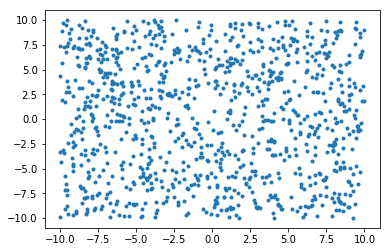

In [386]:
p1 = particle.uniform_particles(1000, [-10,-10], [10,10])
plt.plot(p1[:,0],p1[:,1], '.')

In [387]:
reload(particle)

<module 'particle' from 'particle.py'>

In [388]:
weights = particle.updateWeights(lambda x: 200-(x[:,0]**2 + x[:,1]**2), p1)
weights.shape

((1000, 2), array([-0.23623487,  0.21003487]), array([5.85808809, 5.86481987]))


(1000,)

In [403]:
p2 = p1

((1000, 2), array([-6.56587064,  1.99044149]), array([0.49036428, 0.84557932]))


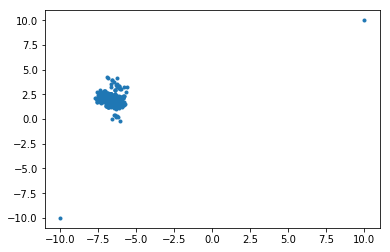

In [409]:
p2 = particle.predict(p2, [0,0], 0.1)
weights = particle.updateWeights(lambda x: -x[:,0], p2)
p2 = particle.simple_resample(p2, weights)
plt.plot(np.r_[p2[:,0],-10,10],np.r_[p2[:,1],-10,10], '.', )

In [385]:
particle.simple_resample(np.array([10,-2,-3,-4,5]),[1,2,50,2,1])

array([-3, -3, -3, -3, -3])